# PCA Implementation
Step-by-step guide to implementing Principal Component Analysis (PCA)

## 1. Introduction
Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of a dataset while retaining most of its important information.\
It achieves this by finding a new set of variables, called principal components, that are linear combinations of the original features.\
The principal components are ordered in such a way that the first component explains the most variance in the data, the second component explains the second most variance, and so on.

In [ ]:
import pandas as pd
import numpy as np

## 2. Loading the Data

In [ ]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

## 3. Preprocessing the Data
First step for PCA is to ensure that all features have zero mean and unit variance



In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Implementing PCA
We will implement PCA using *'sklearn.decomposition'* module.

In [ ]:
from sklearn.decomposition import PCA

# Create a PCA instance
pca = PCA()

# Fit the PCA model
pca.fit(X_scaled)

PCA()

## 5. Explained Variance Ratio
The explained variance ratio tells us the proportion of the dataset's variance explained by each principal component. This information is useful for determining how many components to retain.

In [ ]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

## 6. Choosing the Number of Components
To decide how many components to retain, we can plot the cumulative explained variance ratio and choose the number of components that capture a significant amount of the variance. Typically, we aim to retain around 80-95% of the total variance.

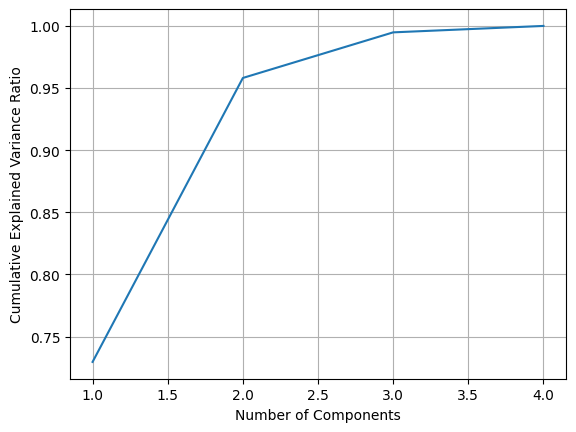

In [ ]:
import matplotlib.pyplot as plt

# Plot the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

Selecting first 2 principal components since we are retaining more than 95% variance

## 7. Transforming the Data
Once we have determined the number of components to retain, we can transform the original data into the new lower-dimensional space using the transform method.

In [ ]:
# Choose the number of components to retain
n_components = 2

# Transform the data
X_transformed = pca.transform(X_scaled)[:, :n_components]

In [ ]:
# Printing new features
print(X_transformed.shape)
print(X_transformed)

(150, 2)
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66

## 8. Visualizing new features

In [ ]:
original_data = pd.DataFrame(X, columns=iris.feature_names)
transformed_data = pd.DataFrame(X_transformed, columns=['PC1', 'PC2'])

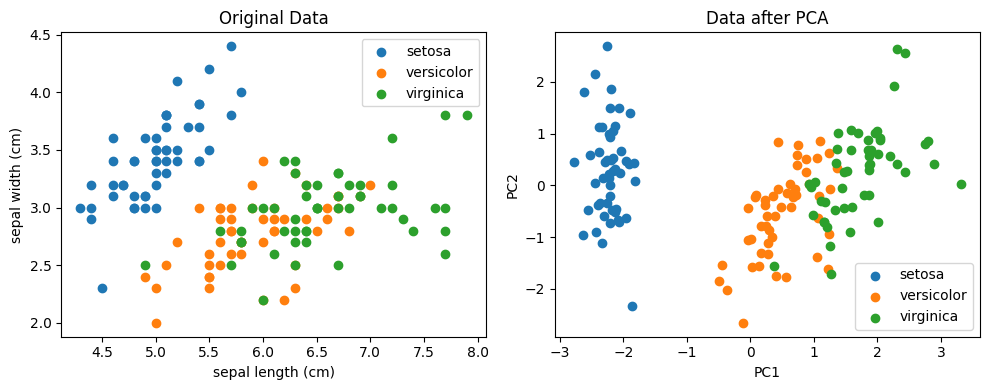

In [ ]:
# Plot the original data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
for target in np.unique(y):
    plt.scatter(original_data[y == target]['sepal length (cm)'],
                original_data[y == target]['sepal width (cm)'],
                label=iris.target_names[target])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Original Data')
plt.legend()

# Plot the transformed data after PCA
plt.subplot(1, 2, 2)
for target in np.unique(y):
    plt.scatter(transformed_data[y == target]['PC1'],
                transformed_data[y == target]['PC2'],
                label=iris.target_names[target])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data after PCA')
plt.legend()

plt.tight_layout()
plt.show()

## 9. Comparing Results
Lets compare our results with and without using PCA.\
We will use knn for classification.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Without PCA
knn_without_pca = KNeighborsClassifier()
knn_without_pca.fit(X_train, y_train)
accuracy_without_pca = knn_without_pca.score(X_test, y_test)

print("Accuracy without PCA:", accuracy_without_pca)

Accuracy without PCA: 1.0


In [ ]:
# With PCA

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

knn_with_pca = KNeighborsClassifier()
knn_with_pca.fit(X_train_pca, y_train_pca)
accuracy_with_pca = knn_with_pca.score(X_test_pca, y_test_pca)

print("Accuracy with PCA:", accuracy_with_pca)

Accuracy with PCA: 0.9333333333333333


We get decent accuracy from only using two components. Try increasing principal components and compare results.

## 10. Conclusion


PCA is a powerful technique for dimensionality reduction and data visualization. It allows us to identify the most important features in a dataset and transform the data into a lower-dimensional space.


## 11. Bonus
Try PCA implementation on MNIST dataset and visualize your results. You will also get to learn about Image classification.

## 12. Resources

*   https://youtu.be/FD4DeN81ODY  (Short video for understanding PCA)
*   https://youtu.be/ey2PE5xi9-A  (Maths part of PCA)
*   https://youtu.be/tofVCUDrg4M  (PCA implementation on MNIST dataset and its 3D visualization)
*   https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598 (PCA implementation without sklearn)


